In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import mglearn

X.shape: (26, 2)


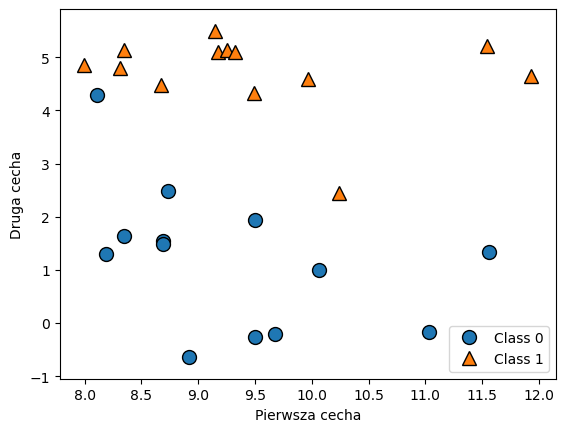

In [2]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['Class 0', 'Class 1'], loc=4)
plt.xlabel('Pierwsza cecha')
plt.ylabel('Druga cecha')
print('X.shape: {}'.format(X.shape))

Text(0, 0.5, 'Target')

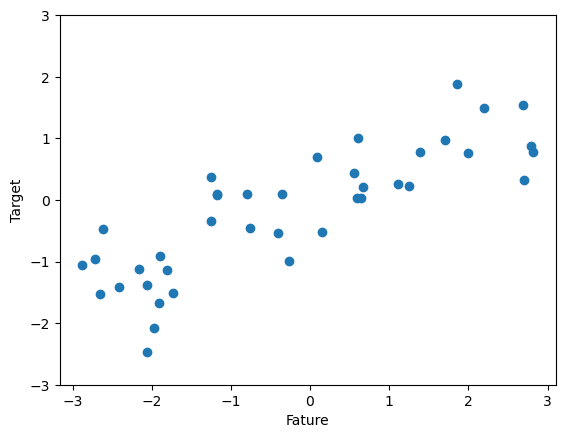

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Fature")
plt.ylabel("Target")

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(f'cnacer.keys(): \n{cancer.keys()}')

cnacer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
print(f'Shape of cancer data: {cancer.data.shape}')

Shape of cancer data: (569, 30)


In [8]:
print('Sample counts per class:\n{}'.format({n : v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [9]:
print(f'Feature names:\n{cancer.feature_names}')

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [13]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
print(f'Data shape: {california.data.shape}')

Data shape: (20640, 8)


In [14]:
X, y = mglearn.datasets.load_extended_boston()
print(f'X.shape: {X.shape}')

X.shape: (506, 104)


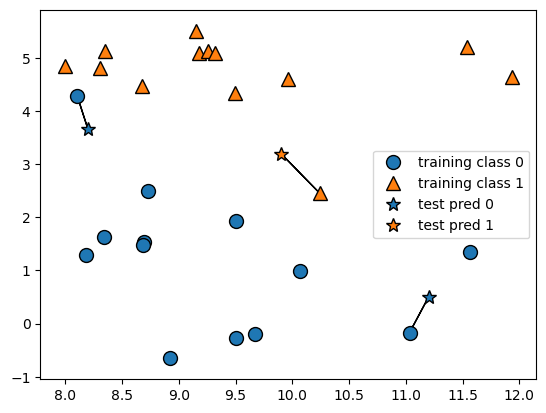

In [15]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

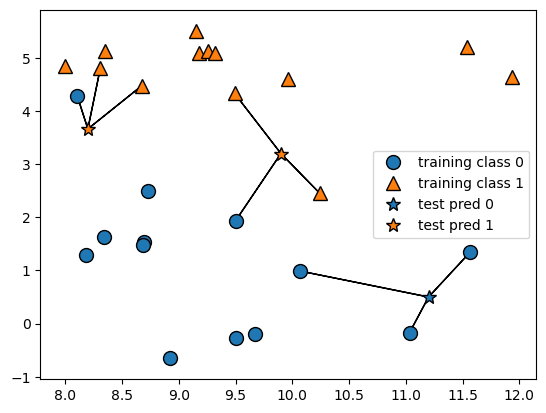

In [16]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [17]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [19]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
print('Test set predictions: {}'.format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [21]:
print(f'Test set accuracy {clf.score(X_test, y_test)}')

Test set accuracy 0.8571428571428571


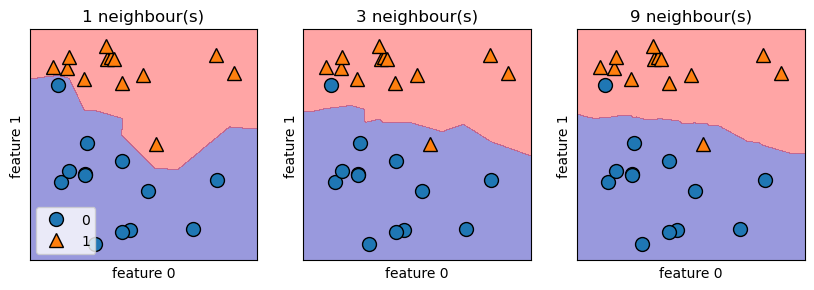

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f'{n_neighbors} neighbour(s)')
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend(loc=3)

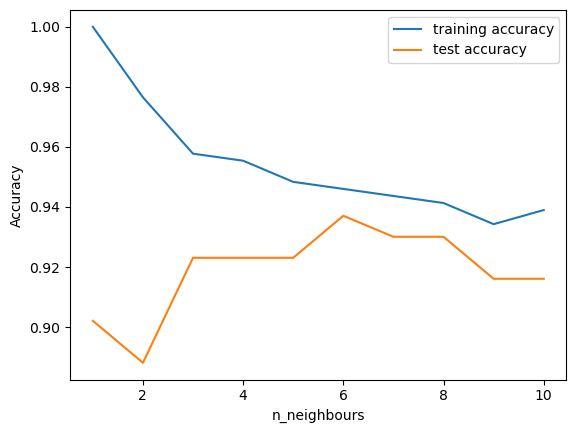

In [25]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbours')
plt.legend()

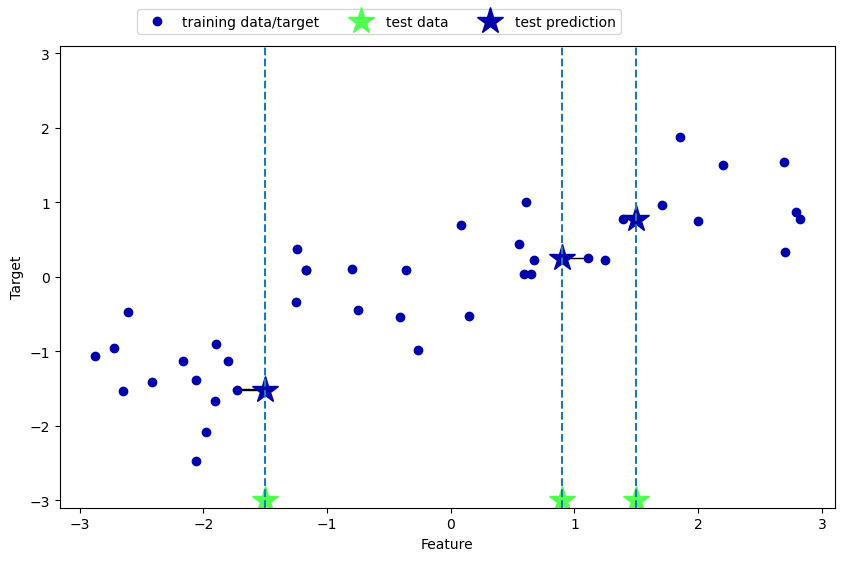

In [26]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

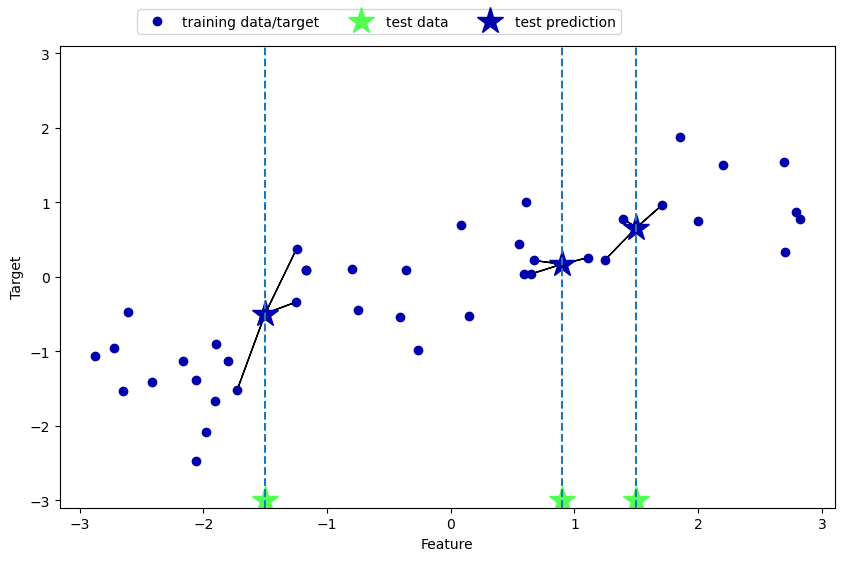

In [27]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [30]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [31]:
print(f'Test set predictions:\n{reg.predict(X_test)}')

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [32]:
print(f'Test set R^2: {reg.score(X_test, y_test)}')

Test set R^2: 0.8344172446249605


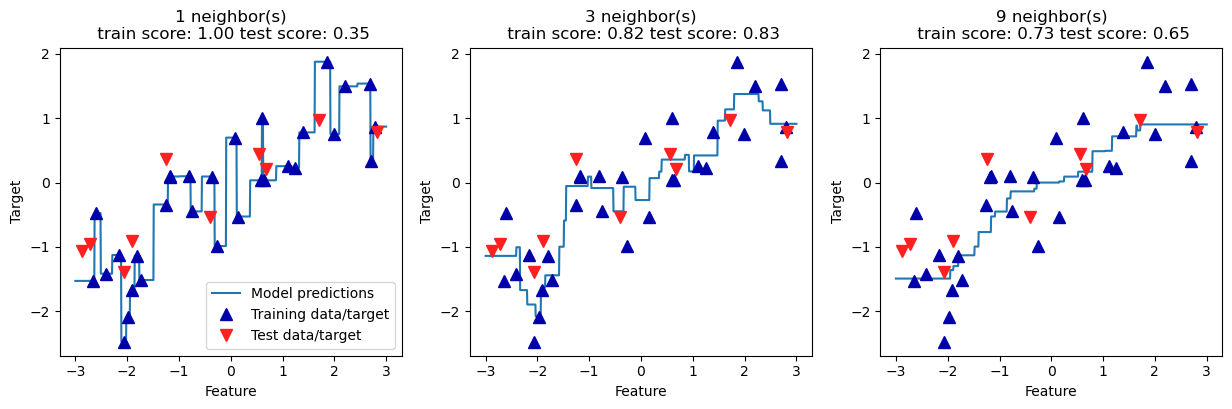

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title('{} neighbor(s)\n train score: {:.2f} test score: {:.2f}'.format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')
axes[0].legend(['Model predictions', 'Training data/target', 'Test data/target'], loc='best')

w[0]: 0.393906  b: -0.031804


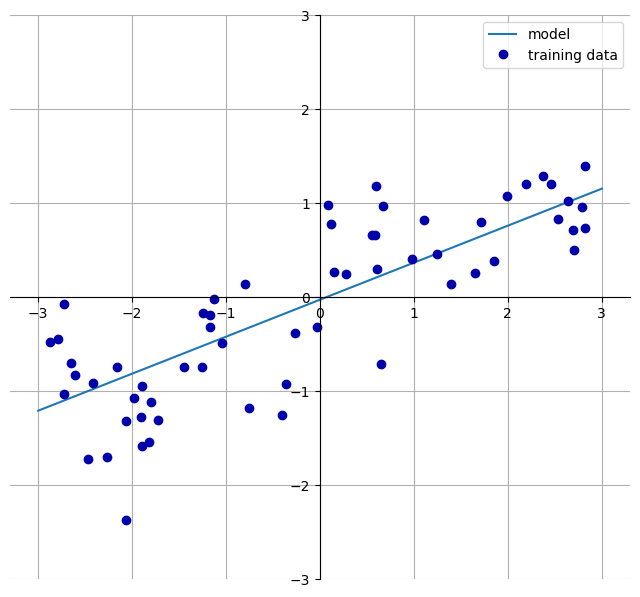

In [35]:
mglearn.plots.plot_linear_regression_wave()

In [36]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [37]:
print(f'lr.coef_: {lr.coef_}')
print(f'lr.intercept_: {lr.intercept_}')

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [38]:
print(f'Training set score: {lr.score(X_train, y_train)}')
print(f'Test set score : {lr.score(X_test, y_test)}')

Training set score: 0.6700890315075756
Test set score : 0.65933685968637


In [39]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [40]:
print(f'Training set score: {lr.score(X_train, y_train)}')
print(f'Testing set score: {lr.score(X_test, y_test)}')

Training set score: 0.9520519609032728
Testing set score: 0.607472195966587


In [41]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print(f'Training set score: {ridge.score(X_train, y_train)}')
print(f'Test set score: {ridge.score(X_test, y_test)}')

Training set score: 0.8857966585170941
Test set score: 0.7527683481744758


In [42]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print(f'Trainig set score {ridge10.score(X_train, y_train)}')
print(f'Test set score {ridge10.score(X_test, y_test)}')

Trainig set score 0.7882787115369614
Test set score 0.6359411489177311


In [43]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print(f'Training set score: {ridge01.score(X_train, y_train)}')
print(f'Test set score: {ridge01.score(X_test, y_test)}')

Training set score: 0.9282273685001983
Test set score: 0.7722067936480148


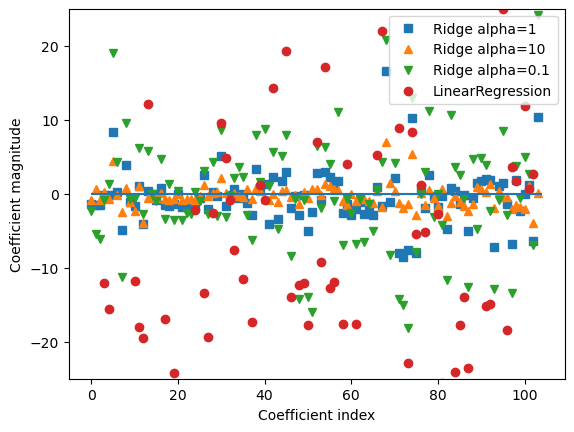

In [44]:
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')
plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

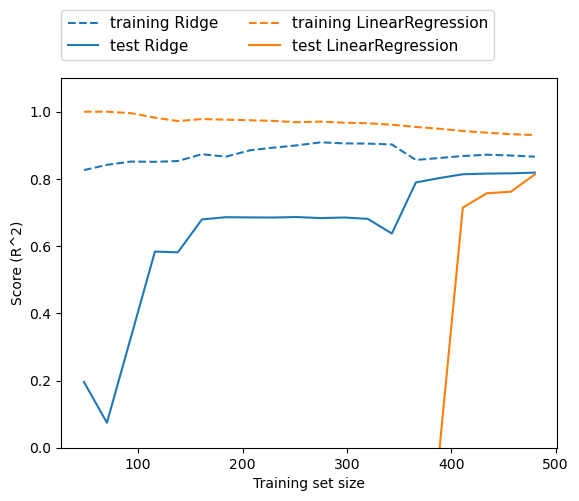

In [45]:
mglearn.plots.plot_ridge_n_samples()

In [47]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print(f'Training set score: {lasso.score(X_train, y_train)}')
print(f'Test set score: {lasso.score(X_test, y_test)}')
print(f'Number of features used: {np.sum(lasso.coef_ != 0)}')

Training set score: 0.29323768991114596
Test set score: 0.20937503255272272
Number of features used: 4


In [48]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print(f'Training set score: {lasso001.score(X_train, y_train)}')
print(f'Test set score: {lasso001.score(X_test, y_test)}')
print(f'Number of featers used: {np.sum(lasso001.coef_ != 0)}')

Training set score: 0.8962226511086498
Test set score: 0.7656571174549986
Number of featers used: 33


In [49]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print(f'Training set score: {lasso00001.score(X_train, y_train)}')
print(f'Testing set score: {lasso00001.score(X_test, y_test)}')
print(f'Number of features used: {np.sum(lasso00001.coef_ != 0)}')

Training set score: 0.9507158754515462
Testing set score: 0.6437467421273156
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

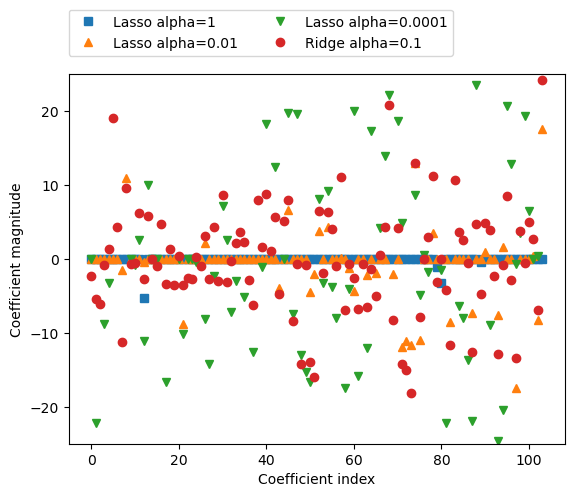

In [50]:
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001')
plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')